In [2]:
#pip install imbalanced-learn
from scipy.stats import sem
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings('ignore')

In [3]:
tracks = pd.read_csv('trafficDataset2.csv')
cols = tracks.columns.values
tracks.head()

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,labels2
0,50187,1842.4,495854.6403,5405750.912,None,None,None,None,None,None,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]",PEDESTRIANS
1,50187,1842.5,495854.7921,5405750.939,None,None,None,None,None,None,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]",PEDESTRIANS
2,50187,1842.6,495854.9438,5405750.966,None,None,None,None,None,None,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]",PEDESTRIANS
3,50187,1842.7,495855.0956,5405750.993,None,None,None,None,None,None,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]",PEDESTRIANS
4,50187,1842.8,495855.2569,5405751.022,None,None,None,None,None,None,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]",PEDESTRIANS


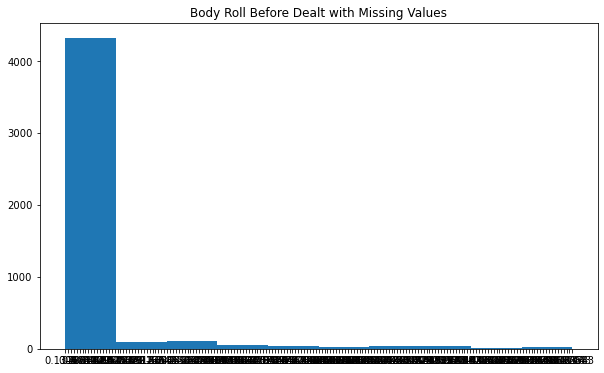

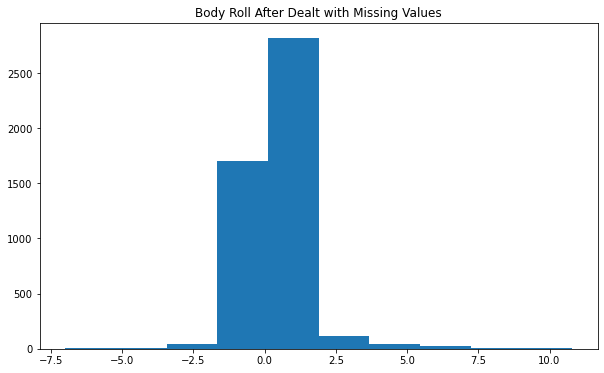

In [4]:
#Dealing with Missing Values
#Body_roll
tracks["body_roll"].mask(tracks["body_roll"] == 'None', "0.13166", inplace=True)
pd.to_numeric(tracks['body_roll'])
df = tracks['body_roll']
df = df.astype('float64',errors="ignore")

#Body_pitch
tracks["body_pitch"].mask(tracks["body_pitch"] == 'None', "0.13166", inplace=True)
pd.to_numeric(tracks['body_pitch'])
df2 = tracks['body_pitch']
df2 = df.astype('float64',errors="ignore")

#Body_yaw
tracks["body_yaw"].mask(tracks["body_yaw"] == 'None', "0.13166", inplace=True)
pd.to_numeric(tracks['body_yaw'])
df3 = tracks['body_yaw']
df3 = df.astype('float64',errors="ignore")

#Head_roll
tracks["head_roll"].mask(tracks["head_roll"] == 'None', "0.13166", inplace=True)
pd.to_numeric(tracks['head_roll'])
df4 = tracks['head_roll']
df4 = df.astype('float64',errors="ignore")

#Head_pitch
tracks["head_pitch"].mask(tracks["head_pitch"] == 'None', "0.13166", inplace=True)
pd.to_numeric(tracks['head_pitch'])
df5 = tracks['head_pitch']
df5 = df.astype('float64',errors="ignore")

#Head_yaw
tracks["head_yaw"].mask(tracks["head_yaw"] == 'None', "0.13166", inplace=True)
pd.to_numeric(tracks['head_yaw'])
df6 = tracks['head_yaw']
df6 = df.astype('float64',errors="ignore")

#mean of body_roll
# body_roll_mean = df.mean()
# body_pitch_mean = df2.mean()
# body_yaw_mean = df3.mean()
# head_roll_mean = df4.mean()

plt.figure(figsize=(10,6))
plt.hist(tracks['body_pitch'])
plt.title('Body Roll Before Dealt with Missing Values')
plt.show()

plt.figure(figsize=(10,6))
np_arr = np.array(df2)
plt.hist(np_arr)
plt.title('Body Roll After Dealt with Missing Values')
plt.show()

# print(body_roll_mean,body_pitch_mean,body_yaw_mean,head_roll_mean)

In [5]:
le = LabelEncoder()
tracks['output'] = le.fit_transform(tracks['labels2'])
tracks['output_class'] = le.fit_transform(tracks['other_class'])
tracks.head()


,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,labels2,output,output_class
0,50187,1842.4,495854.6403,5405750.912,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]",PEDESTRIANS,7,260
1,50187,1842.5,495854.7921,5405750.939,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]",PEDESTRIANS,7,1822
2,50187,1842.6,495854.9438,5405750.966,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]",PEDESTRIANS,7,260
3,50187,1842.7,495855.0956,5405750.993,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]",PEDESTRIANS,7,1486
4,50187,1842.8,495855.2569,5405751.022,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]",PEDESTRIANS,7,1822


In [6]:
X = tracks[['oid','timestamp']].values
y = tracks['output'].values

In [7]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)

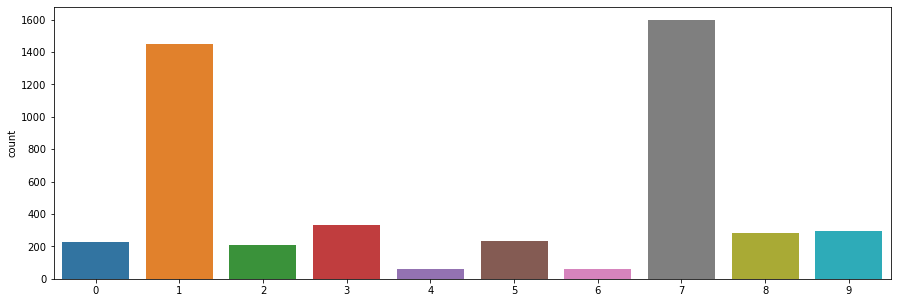

In [8]:
import seaborn as sns
plt.figure(figsize=(15,5))
ax = sns.countplot(y, label="count")

In [9]:
# Oversampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

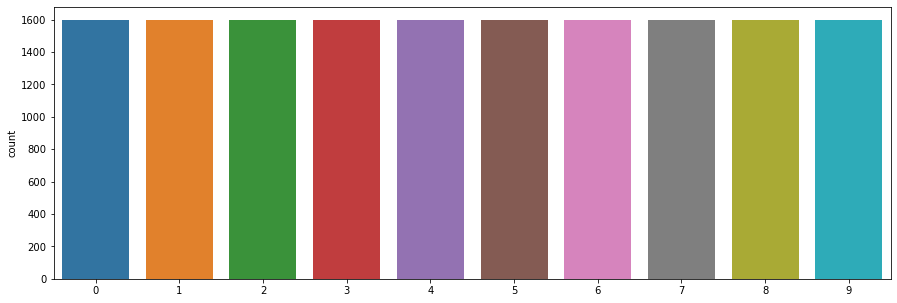

In [10]:
# visualize the Label count
import seaborn as sns
plt.figure(figsize=(15,5))
ax = sns.countplot(y, label="count")

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [12]:
#SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [13]:
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))

print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before OverSampling, counts of label '2': 1260
Before OverSampling, counts of label '1': 1262
Before OverSampling, counts of label '0': 1270 

After OverSampling, counts of label '0': 1325
After OverSampling, counts of label '1': 1325
After OverSampling, counts of label '0': 1325 

Before OverSampling, the shape of train_X: (12784, 2)
Before OverSampling, the shape of train_y: (12784,) 

After OverSampling, the shape of train_X: (13250, 2)
After OverSampling, the shape of train_y: (13250,) 



In [14]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [15]:
from imblearn.over_sampling import SMOTE 
xr, yr = SMOTE(k_neighbors=3).fit_resample(X, y)

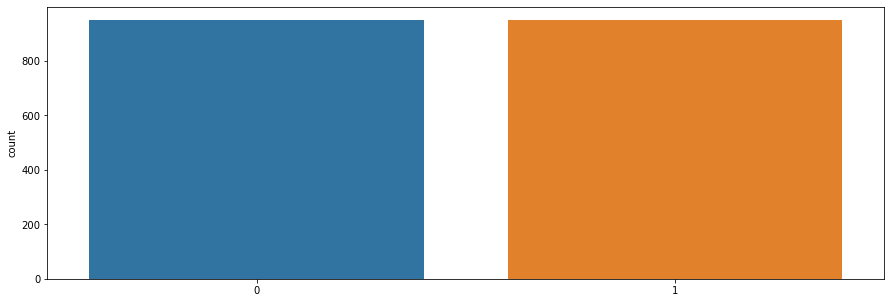

In [16]:
# visualize the Label count
import seaborn as sns
plt.figure(figsize=(15,5))
ax = sns.countplot(yr, label="count")

In [17]:
#Making normalized columns
npTimestamp = np.array(tracks['timestamp'])
npX = np.array(tracks['x'])
npY = np.array(tracks['y'])
npBody_roll = np.array(df)
npBody_pitch = np.array(df2)
npBody_yaw = np.array(df3)

npHead_roll = np.array(df4)
npHead_pitch = np.array(df5)
npHead_yaw = np.array(df6)

npClass = np.array(tracks['output_class'])
npLabels = np.array(tracks['output'])

In [18]:
# import module
import numpy as np

# explicit function to normalize array
def normalize(arr, t_min, t_max):
	norm_arr = []
	diff = t_max - t_min
	diff_arr = max(arr) - min(arr)
	for i in arr:
		temp = (((i - min(arr))*diff)/diff_arr) + t_min
		norm_arr.append(temp)
	return norm_arr

# assign array and range
array_1d = npTimestamp
range_to_normalize = (0, 1)
normalized_timestamp = normalize(
	array_1d, range_to_normalize[0],
range_to_normalize[1])

array_1d = npX
normalized_x = normalize(
	array_1d, range_to_normalize[0],
range_to_normalize[1])

array_1d = npY
normalized_y = normalize(
	array_1d, range_to_normalize[0],
range_to_normalize[1])

array_1d = npBody_roll
normalized_body_roll = normalize(
	array_1d, range_to_normalize[0],
range_to_normalize[1])

array_1d = npBody_pitch
normalized_body_pitch = normalize(
	array_1d, range_to_normalize[0],
range_to_normalize[1])

array_1d = npBody_yaw
normalized_body_yaw = normalize(
	array_1d, range_to_normalize[0],
range_to_normalize[1])

array_1d = npHead_roll
normalized_head_roll = normalize(
	array_1d, range_to_normalize[0],
range_to_normalize[1])

array_1d = npHead_pitch
normalized_head_pitch = normalize(
	array_1d, range_to_normalize[0],
range_to_normalize[1])

array_1d = npHead_yaw
normalized_head_yaw = normalize(
	array_1d, range_to_normalize[0],
range_to_normalize[1])

array_1d = npClass
normalized_output_class = normalize(
	array_1d, range_to_normalize[0],
range_to_normalize[1])

array_1d = npLabels
normalized_labels = normalize(
	array_1d, range_to_normalize[0],
range_to_normalize[1])
# display original and normalized array
# print("Original Array = ", array_1d)
# print("Normalized Array = ", normalized_body_roll)


<AxesSubplot:>

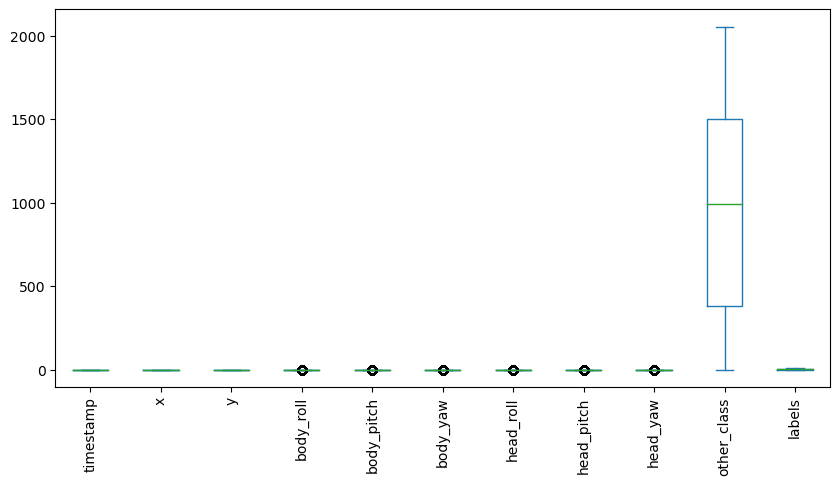

In [19]:
#Creating Normalized Dataset
tracksDataFrame = pd.DataFrame({'timestamp':normalized_timestamp,'x':normalized_x,'y':normalized_y,'body_roll':normalized_body_roll,'body_pitch':normalized_body_pitch,'body_yaw':normalized_body_yaw,'head_roll':normalized_head_roll,'head_pitch':normalized_head_pitch,'head_yaw':normalized_head_yaw,'other_class':npClass,'labels':npLabels})
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
tracksDataFrame.plot.box(rot=90)

In [20]:
tracksDataFrame.head()

,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_class,labels
0,0.667776,0.079453,0.047704,0.400655,0.400655,0.400655,0.400655,0.400655,0.400655,260,7
1,0.667817,0.079747,0.047769,0.400655,0.400655,0.400655,0.400655,0.400655,0.400655,1822,7
2,0.667858,0.080040,0.047834,0.400655,0.400655,0.400655,0.400655,0.400655,0.400655,260,7
3,0.667900,0.080333,0.047899,0.400655,0.400655,0.400655,0.400655,0.400655,0.400655,1486,7
4,0.667941,0.080644,0.047968,0.400655,0.400655,0.400655,0.400655,0.400655,0.400655,1822,7


In [21]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
for c in tracksDataFrame.columns[:-1]:
    tracksDataFrame = remove_outlier(tracksDataFrame, c)
len(tracksDataFrame)

4370

<AxesSubplot:>

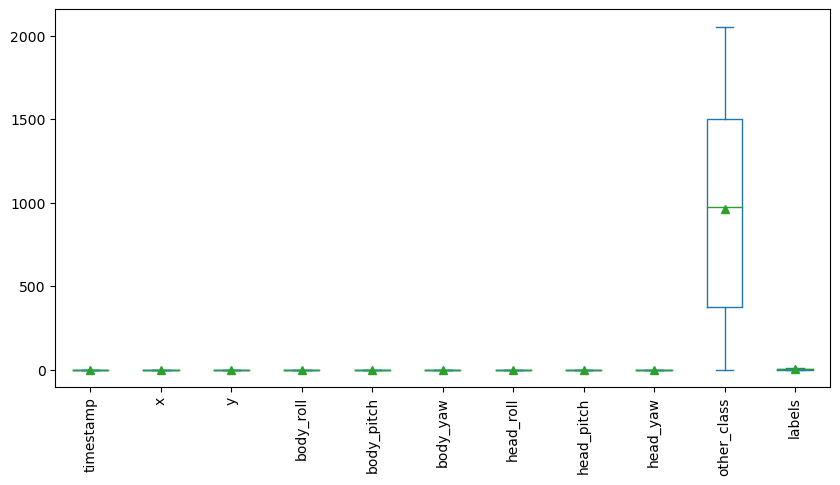

In [22]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
tracksDataFrame.plot.box(rot=90,showmeans=True)

In [23]:
tracks.head()

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,labels2,output,output_class
0,50187,1842.4,495854.6403,5405750.912,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]",PEDESTRIANS,7,260
1,50187,1842.5,495854.7921,5405750.939,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]",PEDESTRIANS,7,1822
2,50187,1842.6,495854.9438,5405750.966,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]",PEDESTRIANS,7,260
3,50187,1842.7,495855.0956,5405750.993,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]",PEDESTRIANS,7,1486
4,50187,1842.8,495855.2569,5405751.022,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]",PEDESTRIANS,7,1822


In [24]:
X = tracks[['oid','timestamp','x','y']].values
y = tracks['labels2'].values

In [25]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)

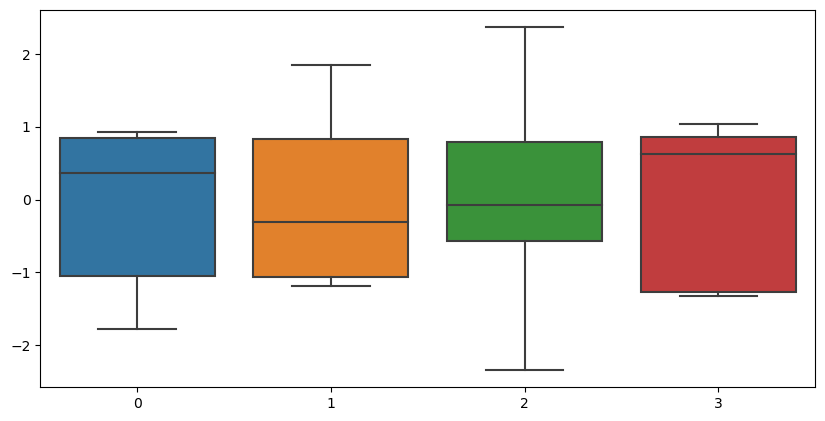

In [26]:
import seaborn as sns
ax = sns.boxplot(data=X)

In [27]:
le = LabelEncoder()
tracks['output'] = le.fit_transform(tracks['labels2'])
tracks.head(10)

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,labels2,output,output_class
0,50187,1842.4,495854.6403,5405750.912,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]",PEDESTRIANS,7,260
1,50187,1842.5,495854.7921,5405750.939,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]",PEDESTRIANS,7,1822
2,50187,1842.6,495854.9438,5405750.966,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]",PEDESTRIANS,7,260
3,50187,1842.7,495855.0956,5405750.993,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]",PEDESTRIANS,7,1486
4,50187,1842.8,495855.2569,5405751.022,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]",PEDESTRIANS,7,1822
5,50187,1842.9,495855.4379,5405751.052,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]",PEDESTRIANS,7,1822
6,50187,1843.0,495855.6188,5405751.083,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[47646, 50184, 50181, 50187]","[0, 4, 4, 4]",PEDESTRIANS,7,260
7,50187,1843.1,495855.7998,5405751.114,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[50181, 50184, 50187, 47646]","[4, 4, 4, 0]",PEDESTRIANS,7,1822
8,50187,1843.2,495855.9636,5405751.156,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[50184, 50187, 47646, 50181]","[4, 4, 0, 4]",PEDESTRIANS,7,1751
9,50187,1843.3,495856.0874,5405751.198,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]",PEDESTRIANS,7,260


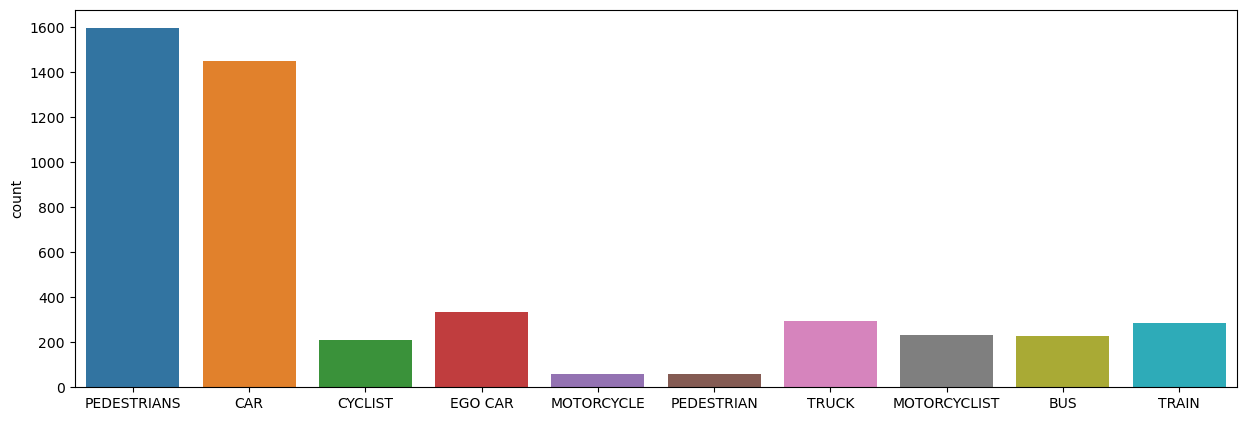

In [28]:
# visualize the Label count
import seaborn as sns
plt.figure(figsize=(15,5))
ax = sns.countplot(y, label="count")

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [30]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [31]:
from imblearn.over_sampling import SMOTE 
xr, yr = SMOTE(k_neighbors=11).fit_resample(X, y)

In [32]:
#SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [33]:
from imblearn.over_sampling import SMOTE

xr, yr = SMOTE(k_neighbors=3).fit_resample(X, y)

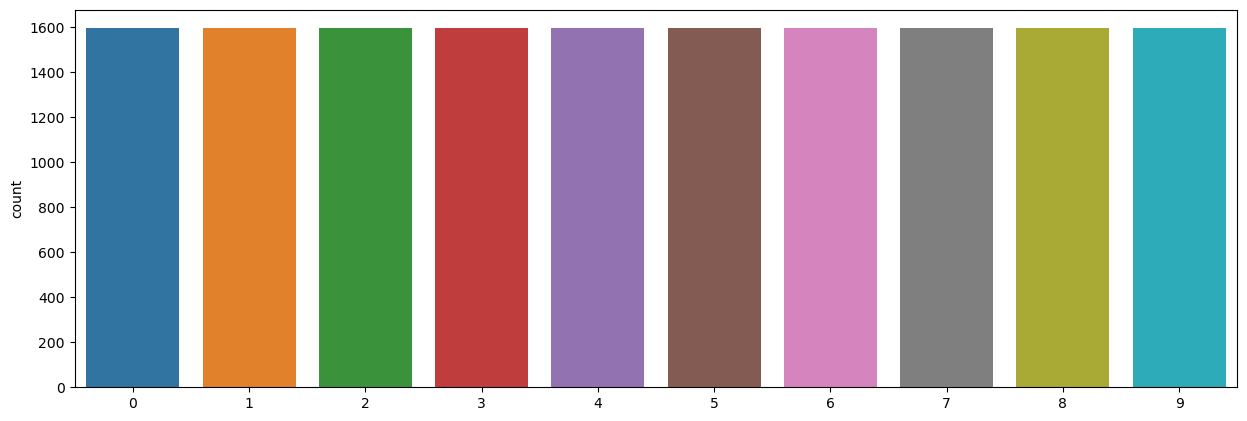

In [34]:
# visualize the Label count
import seaborn as sns
plt.figure(figsize=(15,5))
ax = sns.countplot(yr, label="count")

In [35]:
#Shuffle Data
from sklearn.utils import shuffle
tracks = shuffle(tracks)
tracks.head()


,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,labels2,output,output_class
1240,7683,316.9,496178.5424,5405733.943,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[7693, 7696, 7697, 7698, 7699, 7700, 7682, 768...","[3, 3, 3, 3, 3, 3, 4, 4, 0, 3, 3]",EGO CAR,3,758
482,20713,1273.7,496062.9870,5406115.506,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[20720, 20713, 20721, 20717, 18991]","[3, 4, 3, 3, 0]",CAR,1,1113
3123,41665,2360.8,496171.4747,5406086.382,0,-2.2,181.2,0,0.8,188.4,"[41668, 41665, 41670, 41669, 41650, 41660, 416...","[3, 4, 3, 3, 3, 3, 3, 0, 3]",CAR,1,1133
749,19349,237.6,496019.8987,5406113.872,0.13166,0.13166,0.13166,0.13166,0.13166,0.13166,"[19347, 19339, 19340, 19348, 19349, 19354, 189...","[3, 4, 4, 4, 4, 3, 0, 3, 3, 5, 3]",PEDESTRIANS,7,1273
4460,48633,715.6,496230.8483,5406061.431,0,0,290.37,0,0,212.84,"[48633, 47646, 48566]","[4, 0, 3]",TRUCK,9,1471


In [36]:
X = tracks[['oid','timestamp']].values
y = tracks['output'].values

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[3 1 1 ... 7 1 1]


In [38]:
#Divide into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) # 80% training and 20% test


In [39]:
from sklearn.metrics import accuracy_score

train_score = []
test_score = []
k_vals = []
accuracy = []

for k in range(1,100,2):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)
    y_predict = knn.predict(X_test)
    acc = accuracy_score(y_test,y_predict)
    accuracy.append(acc)

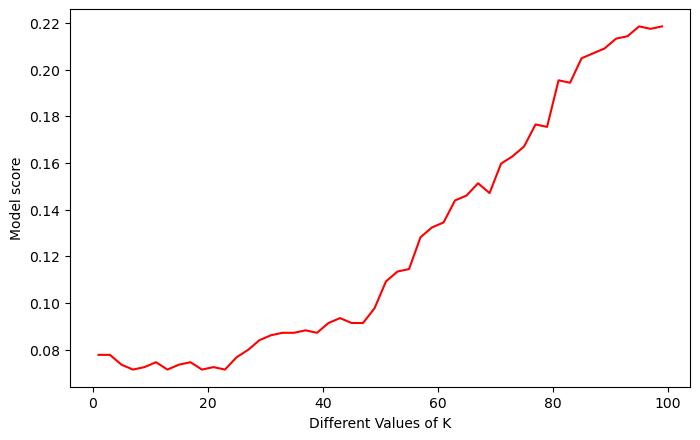

In [40]:
ones = np.ones(len(accuracy))
loss = ones - accuracy
plt.figure(figsize=(8,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, loss, color = 'r')
plt.show()

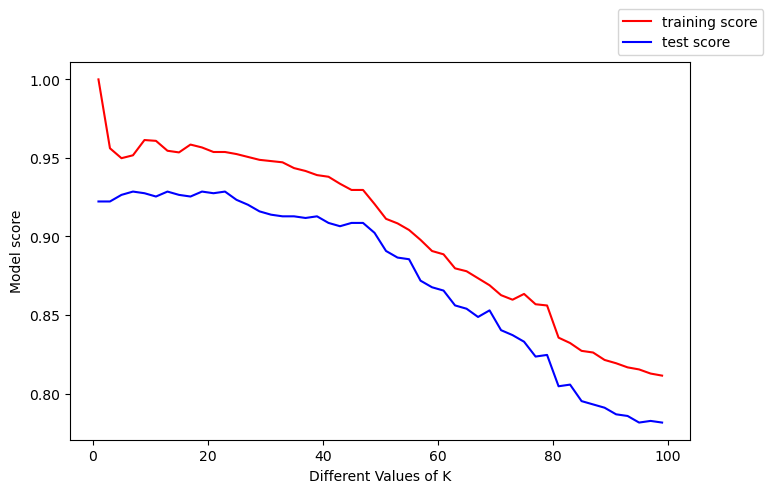

In [41]:
plt.figure(figsize=(8,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [42]:
knn = KNeighborsClassifier(n_neighbors = 15)

#Fit the model
knn.fit(X_train,y_train)

#get the score
accuracy = knn.score(X_test,y_test)


In [43]:
accuracy

0.9264705882352942

In [44]:
X = tracks[['oid','timestamp']].values
y = tracks['output'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.20, random_state = 0)

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score

m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))
rfc_prob = rf.predict_proba(X_test)[:-1]

confussion matrix
[[ 140   40    0    0    0    0    0    0    0    0]
 [   2 1028    0    0    0   25    0  112    0    0]
 [   0   15  110    0    0   24    0   19    0    0]
 [   0   15    0  229    0    0    0   32    0    0]
 [   0    0    0    0    0    0    0   50    0    0]
 [   0    0    0    0    0  165    0   23    0    0]
 [   0    0    0    0    0   24    0   29    0    0]
 [   0   10    0    0    0    0    0 1266    0    0]
 [   0    0    0    0    0    0    0    0  220    0]
 [   0    0    0    0    0   24    0   24    0  182]]


Accuracy of Random Forest: 87.71008403361344 

              precision    recall  f1-score   support

           0       0.99      0.78      0.87       180
           1       0.93      0.88      0.90      1167
           2       1.00      0.65      0.79       168
           3       1.00      0.83      0.91       276
           4       0.00      0.00      0.00        50
           5       0.63      0.88      0.73       188
           6       0.00

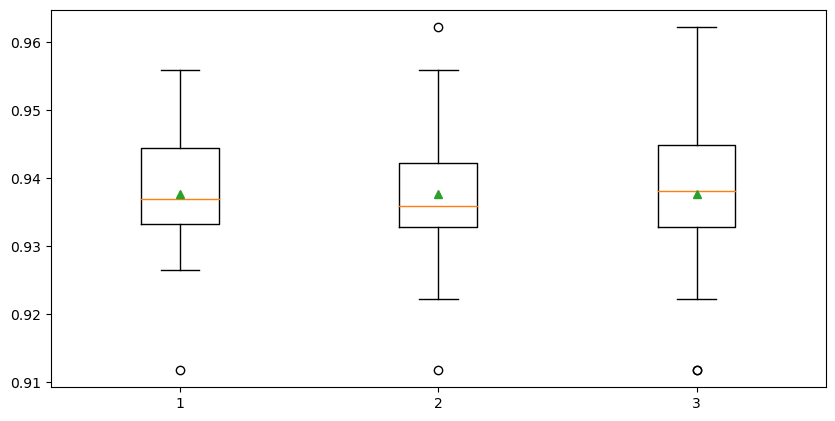

In [48]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from matplotlib import pyplot as plt

def evaluate_model(X, y, repeats):
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    model = KNeighborsClassifier(3)
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=cv, n_jobs=-1)
    return scores

def callModel(X, y):
    repeats = range(1,4)
    results = []
    for r in repeats:
        scores = evaluate_model(X, y, r)
        results.append(scores)
    plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
    plt.show()
    
X = tracks[['oid','timestamp']].values
y = tracks['output'].values
callModel(X, y)

In [49]:
import time

In [50]:
X = tracks[['oid','timestamp']].values
y = tracks['output'].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.20, random_state = 0)

accuracy_all = []
cvs_all = []

In [52]:
from sklearn.linear_model import SGDClassifier

start = time.time()

clf = SGDClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("SGD Classifier Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

SGD Classifier Accuracy: 16.81%
Cross validation score: 24.50% (+/- 21.32%)
Execution time: 1.202 seconds 



In [88]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))
knn_prob = clf.predict_proba(X_test)[:-1]
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))



Accuracy: 91.41%
Cross validation score: 93.86% (+/- 0.95%)
Execution time: 0.61075 seconds 



In [87]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))
gnb_prob = clf.predict_proba(X_test)[:-1]
print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))



Accuracy: 33.06%
Cross validation score: 32.23% (+/- 1.28%)
Execution time: 0.032397 seconds 



In [89]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))
dtc_prob = clf.predict_proba(X_test)[:-1]
print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))


Dedicion Tree Accuracy: 94.20%


In [68]:
from sklearn.metrics import confusion_matrix
yPred = knn.predict(X_test)
m = confusion_matrix(yPred,y_test)

print(classification_report(y_test,yPred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       0.93      0.97      0.95      1167
           2       0.77      0.77      0.77       168
           3       1.00      1.00      1.00       276
           4       1.00      1.00      1.00        50
           5       0.74      0.80      0.77       188
           6       0.29      0.09      0.14        53
           7       1.00      1.00      1.00      1276
           8       1.00      1.00      1.00       220
           9       0.92      0.82      0.86       230

    accuracy                           0.95      3808
   macro avg       0.87      0.85      0.85      3808
weighted avg       0.94      0.95      0.94      3808



In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
model = KNeighborsClassifier()
model.fit(X_train,y_train)
yProb = model.predict_proba(X_test)
roc_auc_score(y_test,yProb, multi_class='ovo')

0.9573541708958933

In [93]:
#ROC and AUC value....


# 1) Knn Classification
# 2) GaussianNB
# 3) DecisionTreeClassifier
# 4) RandomForestClassifier

from sklearn.metrics import roc_curve, auc, roc_auc_score
y_test = pd.Series(y_test).replace({'legitimate':0, 'phishing':1})

#Model 1 -- Knn Classification
rocScore_knn = roc_curve(y_test, knn_prob, multi_class="ovr",average=None)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, knn_prob)
auc_LR = auc(knn_fpr, knn_tpr)


#Model 2 --Guassian NB
rocScore_gnb = roc_auc_score(y_test, gnb_prob)
gnb_fpr, gnb_tpr, gnb_threshold = roc_curve(y_test, gnb_prob)
auc_KNC = auc(gnb_fpr, gnb_tpr)

#model 3 -- Decision Tree Classifier
rocScore_dtc = roc_auc_score(y_test, dtc_prob)
dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(y_test, dtc_prob)
auc_SVC = auc(dtc_fpr, dtc_tpr)


#Model 4 -- Random Forest
rocScore_rfc = roc_auc_score(y_test, rfc_prob)
rfc_fpr, rfc_tpr, rfc_threshold = roc_curve(y_test, rfc_prob)
auc_NB = auc(rfc_fpr, rfc_tpr)


plt.figure(figsize=(12,7))
plt.plot(knn_fpr, knn_tpr, label = f'AUC (KNN Classifier) = {rocScore_knn:.2f}', linewidth = 4)
plt.plot(gnb_fpr, gnb_tpr, label = f'AUC (GaussianNB Classifier ) = {rocScore_gnb:.2f}', linewidth = 4)
plt.plot(dtc_fpr, dtc_tpr, label = f'AUC (Decision Tree Classifier ) = {rocScore_dtc:.2f}', linewidth = 4)
plt.plot(rfc_fpr, rfc_tpr, label = f'AUC (Random Forest Classifier ) = {rocScore_rfc:.2f}', linewidth = 4)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

TypeError: roc_curve() got an unexpected keyword argument 'multi_class'

In [95]:
# all imports
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.datasets import  make_classification
from sklearn.ensemble import RandomForestClassifier
# dummy dataset
X, y = make_classification(10000, n_classes=5, n_informative=10, weights=[.04, .4, .12, .5, .04])
train, test, ytrain, ytest = train_test_split(X, y, test_size=.3, random_state=42)

# random forest model
model = RandomForestClassifier()
model.fit(train, ytrain)
yhat = model.predict(test)

In [100]:
def plot_roc_curve(y_test, y_pred):
  
  n_classes = len(np.unique(y_test))
  y_test = label_binarize(y_test, classes=np.arange(n_classes))
  y_pred = label_binarize(y_pred, classes=np.arange(n_classes))

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  
  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  #plt.figure(figsize=(10,5))
  plt.figure(dpi=500)
  lw = 2
  plt.plot(fpr["micro"], tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink", linestyle=":", linewidth=4,)

  plt.plot(fpr["macro"], tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy", linestyle=":", linewidth=4,)

  colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristic (ROC) curve")
  plt.legend()

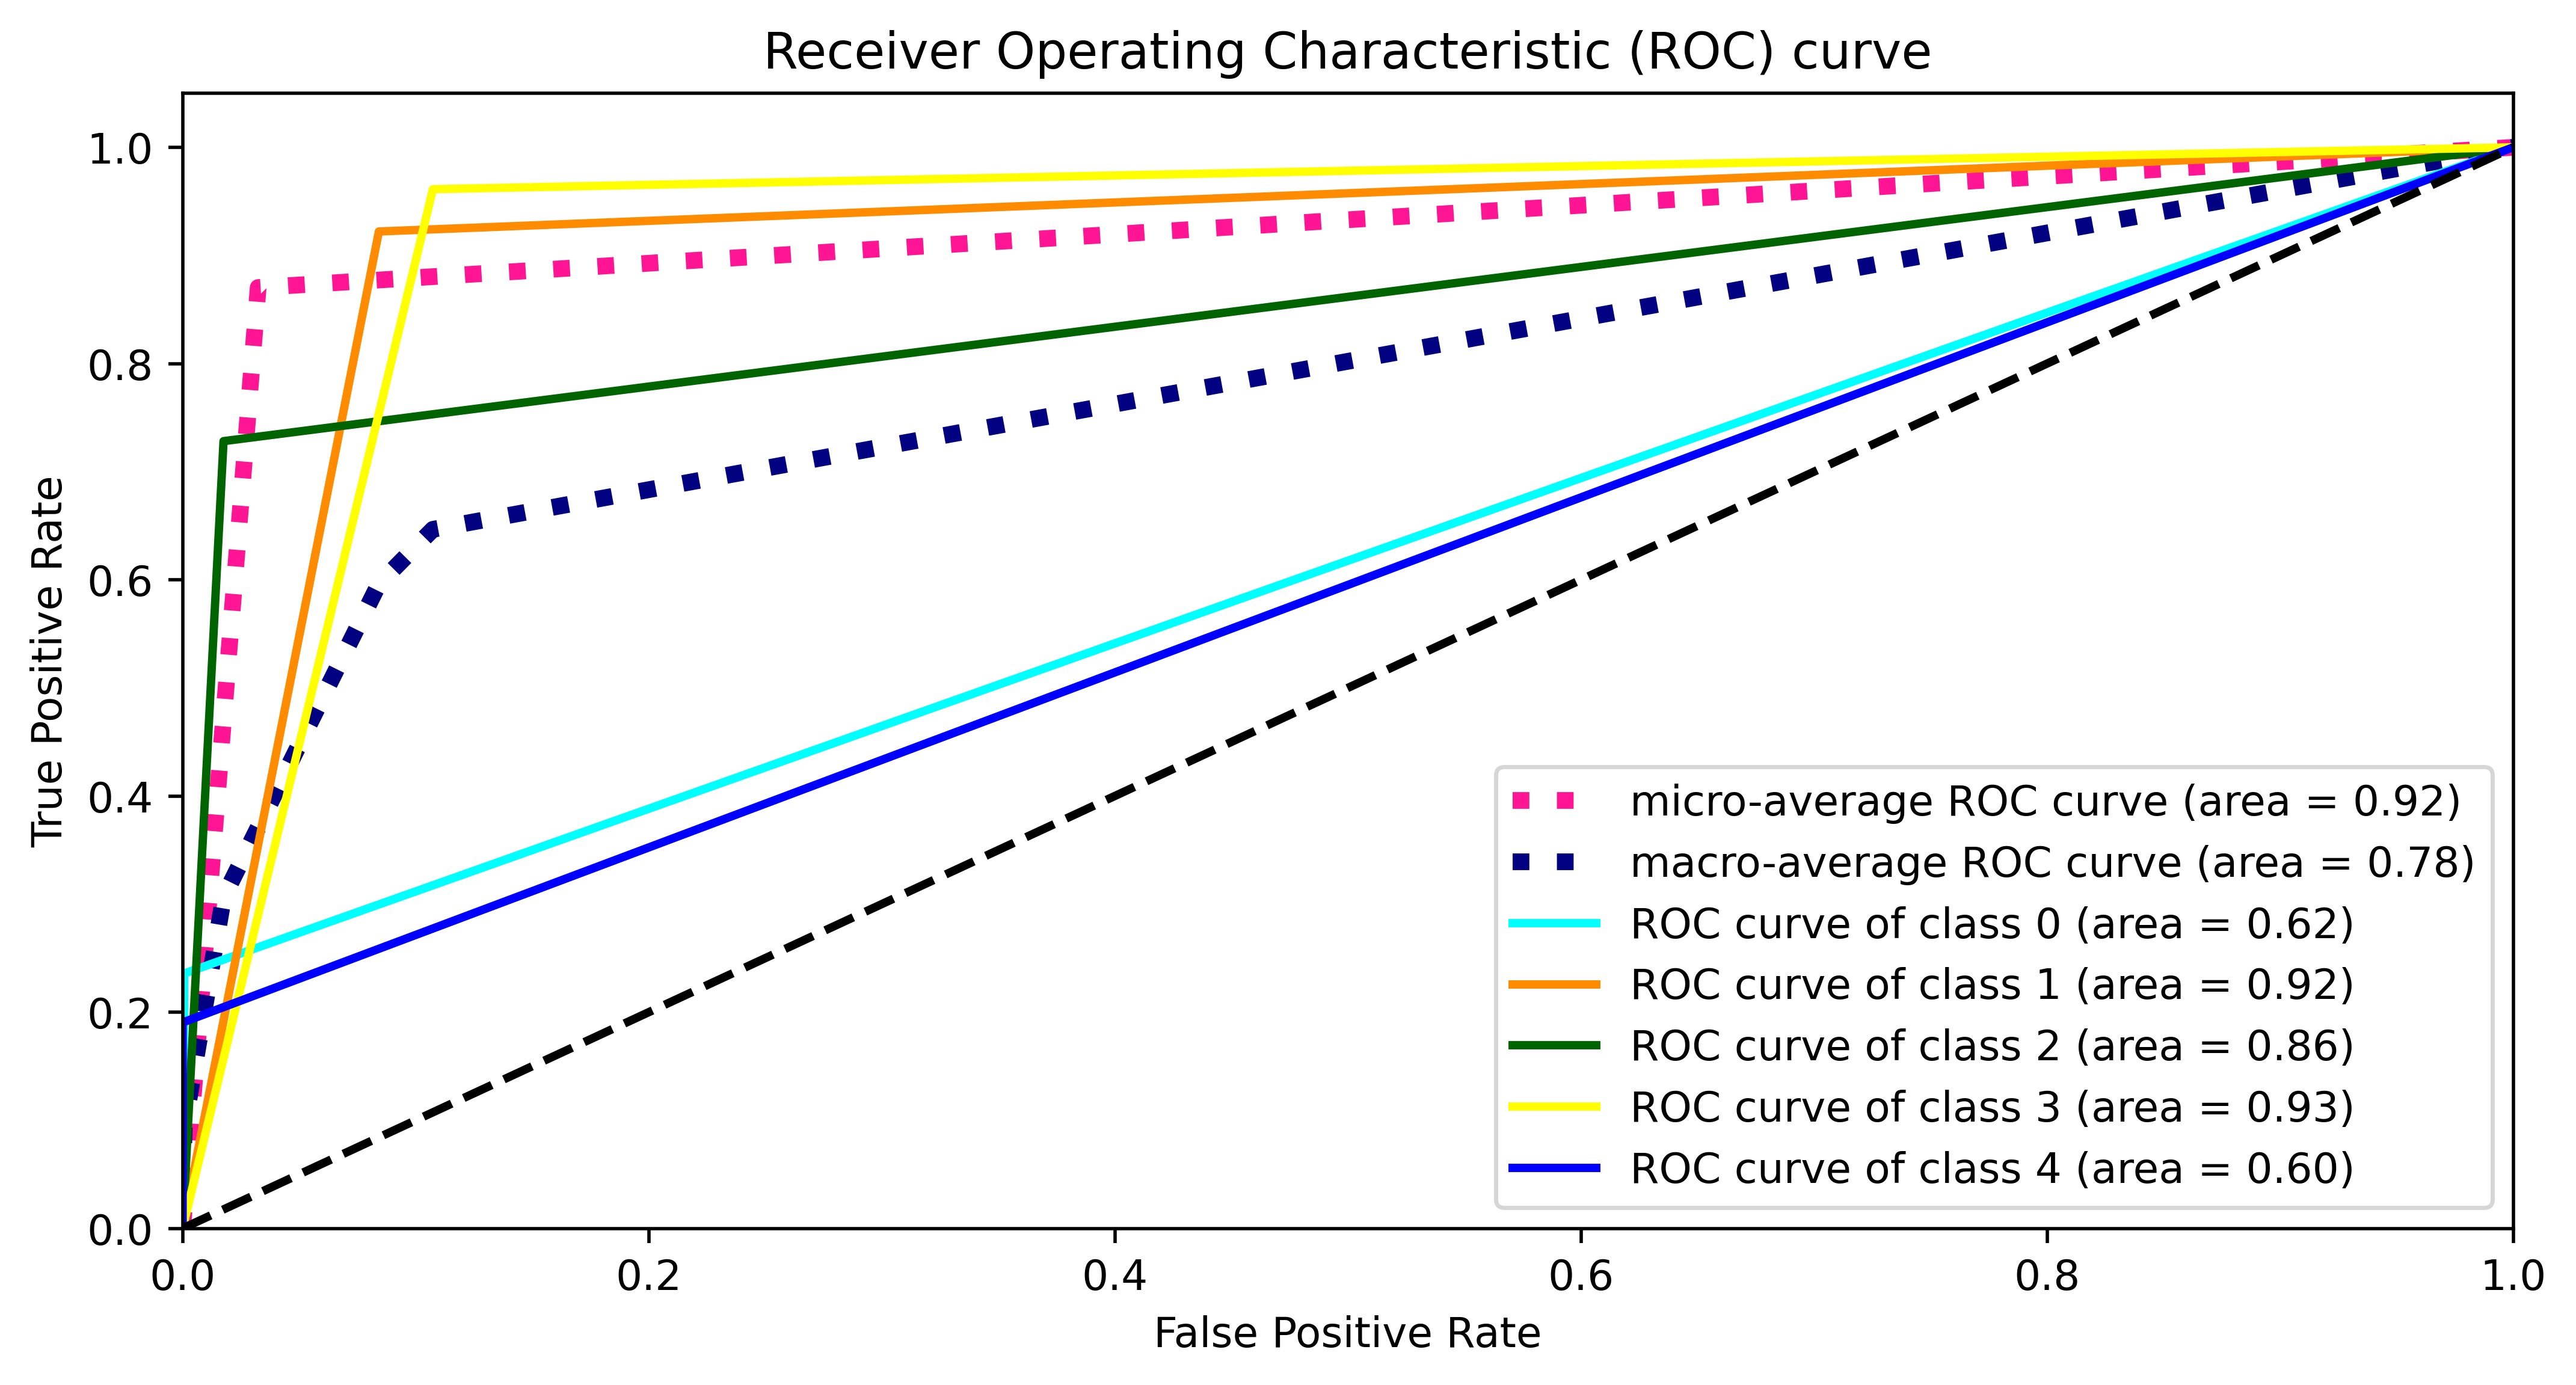

In [101]:
plot_roc_curve(ytest, yhat)